In [1]:
import pandas as pd
\
from Outlier_Detection.sort_date import sort_date
from Outlier_Detection.remove_nan import remove_nan

import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_name = 'C:/Users/interXlab01/Desktop/DATA/Hanju/CSV/1/201805.csv'
df = pd.read_csv(file_name,low_memory=False, index_col=None, encoding='utf-8')

df = remove_nan(sort_date(df))

line1_1 = df[df['작업라인']=='전자교반 1라인 1호기']
line1_1 = line1_1[line1_1['품명']=='IG CARRIER-RR RH']
plot_data = line1_1

In [38]:
from sklearn.svm import OneClassSVM 

data = plot_data[plot_data['작업라인']=='전자교반 1라인 1호기']
del data['금형코드']
del data['전자교반 가동시간']
del data['생산수량']

data = data[data['품명']=='IG CARRIER-RR RH']
outlier_tbl = pd.DataFrame(columns=['Working no','Variable name','Value','Algorithm name','date'])
n = 0 #column number

for i in data.dtypes:
    if i == np.int64 or i == np.float64 : # 정수형만 outlier 제거
        #print(data.iloc[:,n])
        # nan값 채우기
        data.iloc[:,n] = data.iloc[:,n].interpolate(method='linear', order=1, limit_direction='both')

        #-------------------------------------------
        #ee = OneClassSVM(nu=0.2, kernel='poly')
        ee = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
        yhat = ee.fit_predict(data.iloc[:,n].to_numpy().reshape(-1,1))

        indx = np.where(yhat==-1)

        for j in indx[0]:
            outlier_tbl = outlier_tbl.append({'Working no':data.iloc[j,:].date,'Variable name':data.columns[n],'Value':data.iat[j,n],'Algorithm name':'SVM','date':data.iloc[j,:].date}, ignore_index=True)
        #-------------------------------------------


    n+=1


    


저속구간속도


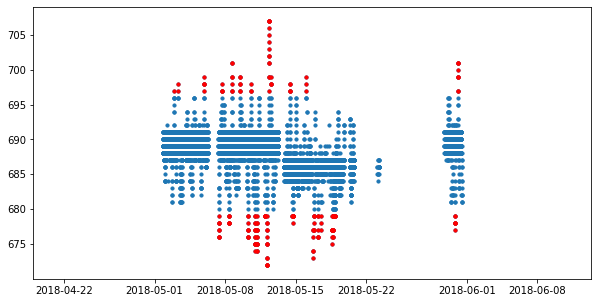

용탕온도


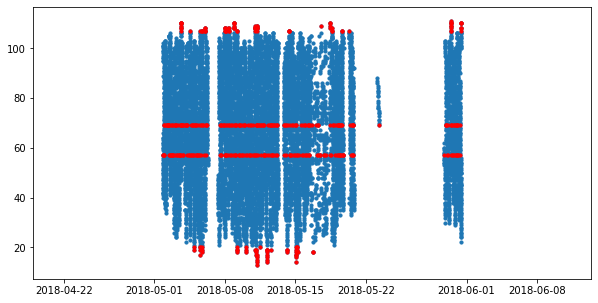

가동보온로


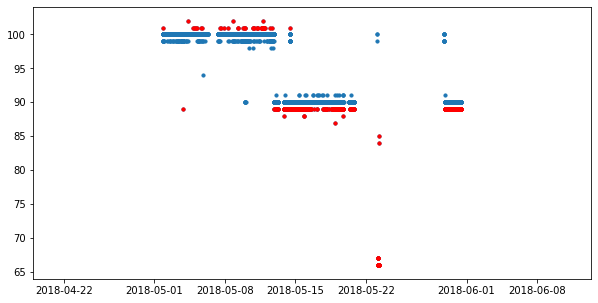

용탕량


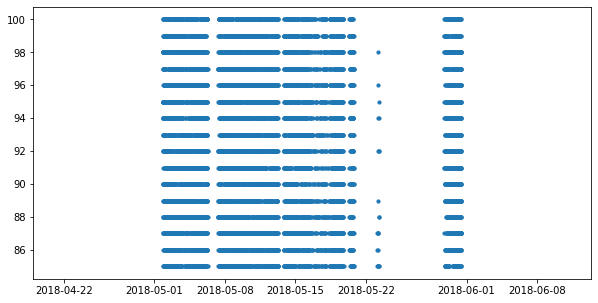

주조(증압)압력


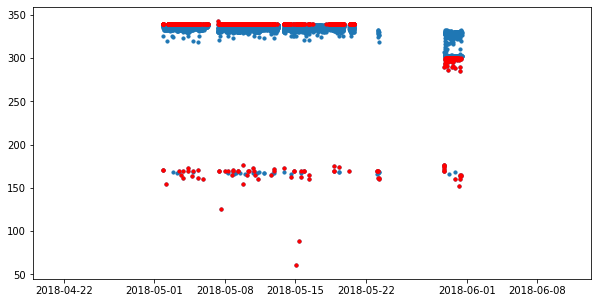

비스켓 두께


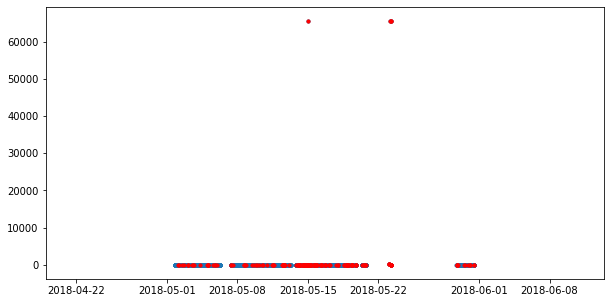

상금형온도1


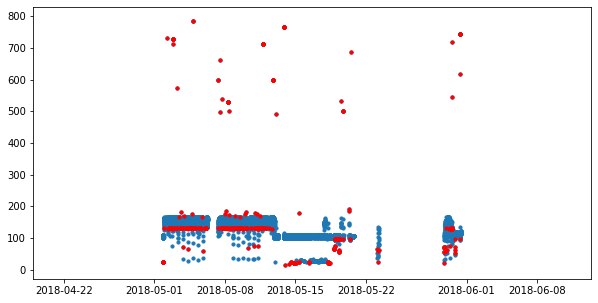

상금형온도2


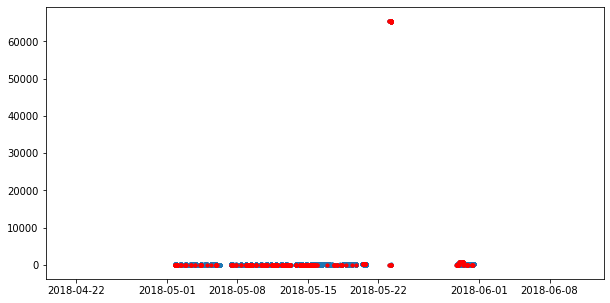

상금형온도3


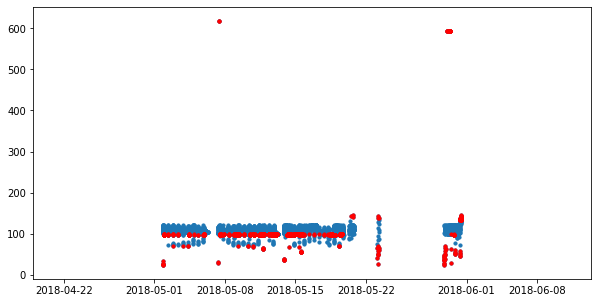

상금형온도4


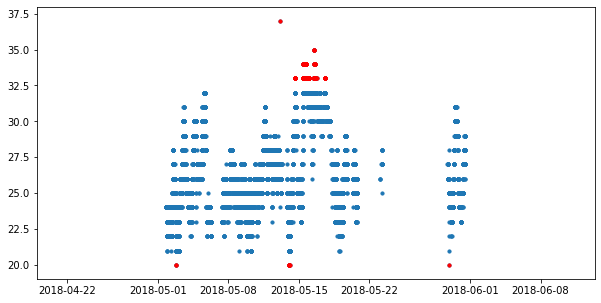

상금형온도5


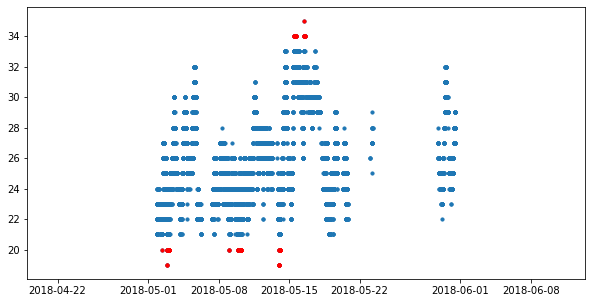

하금형온도1


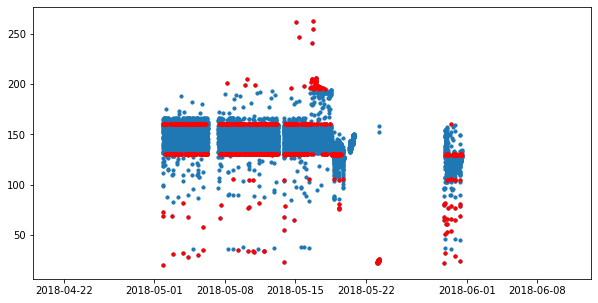

하금형온도2


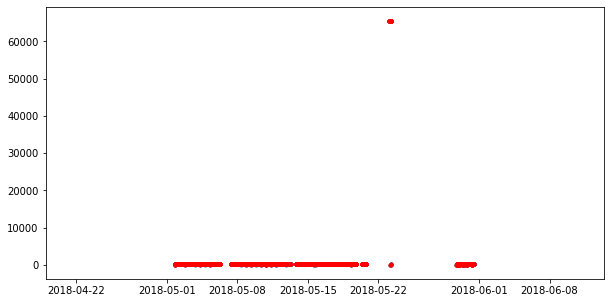

하금형온도3


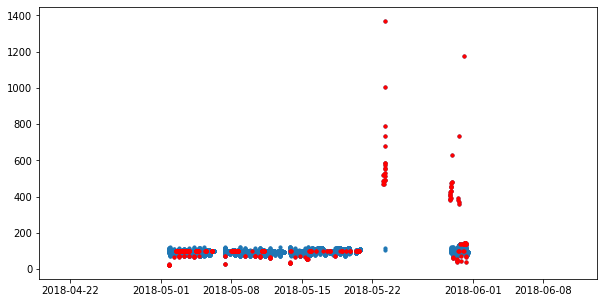

하금형온도4


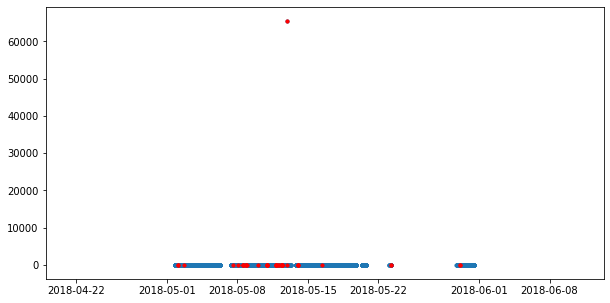

슬리브온도


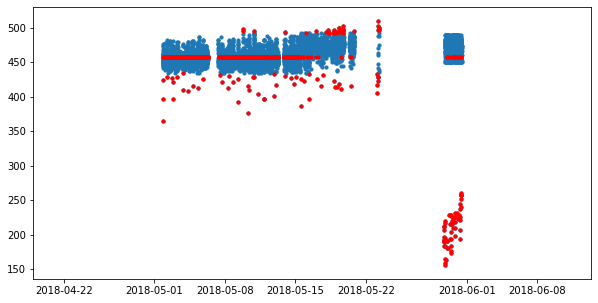

형체력


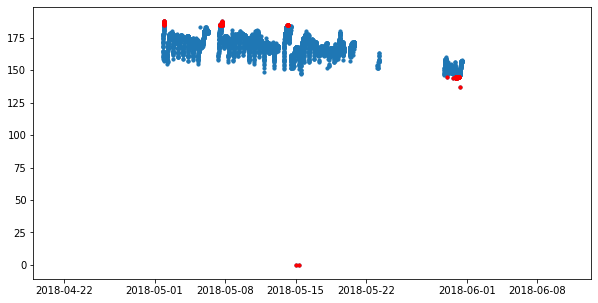

냉각수 온도


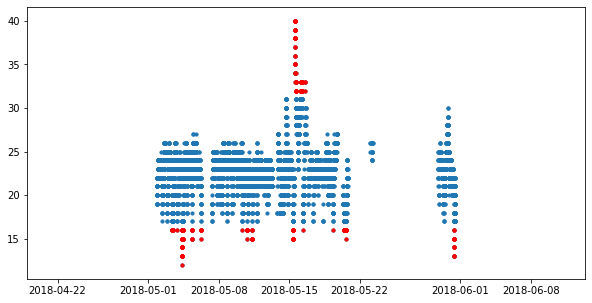

설비가동 CT


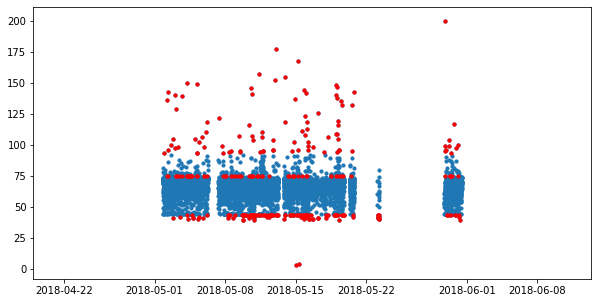

제품생산 CT


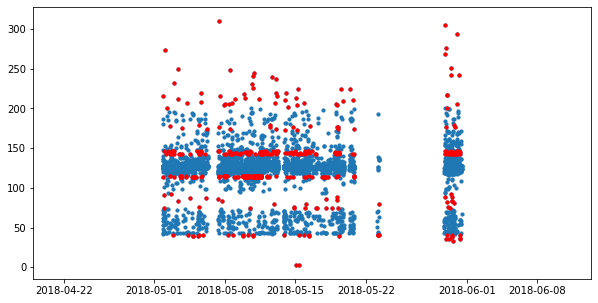

In [37]:
# SVM data 
n=0

for i in data.dtypes:
    #print(i,df.iloc[:,n])
    if(i==np.int64 or i== np.float64 ):
        print(data.columns[n])
        
        plt.figure(figsize=(10,5))
        plt.scatter(data['date'],data.iloc[:,n],s=10)

        a = outlier_tbl[outlier_tbl['Variable name']==data.columns[n]]
        a = a.sort_values('date')
        plt.scatter(a['date'],a['Value'],s=10,color='r')
        plt.show()
    n+=1

In [35]:

outlier_tbl

,Working no,Variable name,Value,Algorithm name,date
0,2018-05-02 22:49:32,저속구간속도,696,SVM,2018-05-02 22:49:32
1,2018-05-02 22:51:39,저속구간속도,697,SVM,2018-05-02 22:51:39
2,2018-05-02 22:53:44,저속구간속도,696,SVM,2018-05-02 22:53:44
3,2018-05-02 22:55:48,저속구간속도,696,SVM,2018-05-02 22:55:48
4,2018-05-02 22:57:55,저속구간속도,696,SVM,2018-05-02 22:57:55
...,...,...,...,...,...
18851,2018-05-31 11:13:26,제품생산 CT,128,SVM,2018-05-31 11:13:26
18852,2018-05-31 11:27:09,제품생산 CT,128,SVM,2018-05-31 11:27:09
18853,2018-05-31 11:55:13,제품생산 CT,128,SVM,2018-05-31 11:55:13
18854,2018-05-31 11:57:20,제품생산 CT,128,SVM,2018-05-31 11:57:20
